# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install seaborn==0.13.2
!pip install matplotlib==3.10.0
!pip install pillow==11.1.0
!pip install tensorflow==2.18.0
!pip install keras==3.8.0
!pip install scikit-learn==1.6.1

In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn

Load the dataset.

In [4]:
# Load and unzip the dataset
import zipfile
import os

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images
def load_images(directory):
    images = []
    labels = []
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file_path.endswith('.jpg') or file_path.endswith('.jpeg') or file_path.endswith('.png'):
                    image = Image.open(file_path)
                    image
                    images.append(image)
                    labels.append(folder)
    return images, labels

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [6]:
# Get the images and their labels
directory = 'data/data'
images, labels = load_images(directory)
len(images), len(labels)


(7625, 7625)

In [7]:
unique_labels=list(dict.fromkeys(labels))
unique_labels

['Metal', 'Cardboard', 'Glass', 'Other', 'Plastic', 'Food_Waste', 'Paper']

Perform any operations, if needed, on the images and labels to get them into the desired format.

In [8]:
# Convert images to numpy arrays
images_array = np.array([np.array(img) for img in images])

# Check the image values and rescale to 0-1
print("Original image values range:", images_array.min(), "to", images_array.max())
images_array = images_array.astype('float32') / 255.0
print("Rescaled image values range:", images_array.min(), "to", images_array.max())

# Determine the number of channels
if len(images_array.shape) == 4:
    print("Number of channels:", images_array.shape[-1])
elif len(images_array.shape) == 3:
     print("Number of channels: 1 (grayscale)")
else:
    print("could not determine number of channels")

Original image values range: 0 to 255
Rescaled image values range: 0.0 to 1.0
Number of channels: 3


### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [9]:
# Visualise Data Distribution

label_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values)
plt.title('Distribution of Waste Material Classes')
plt.xlabel('Waste Material Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

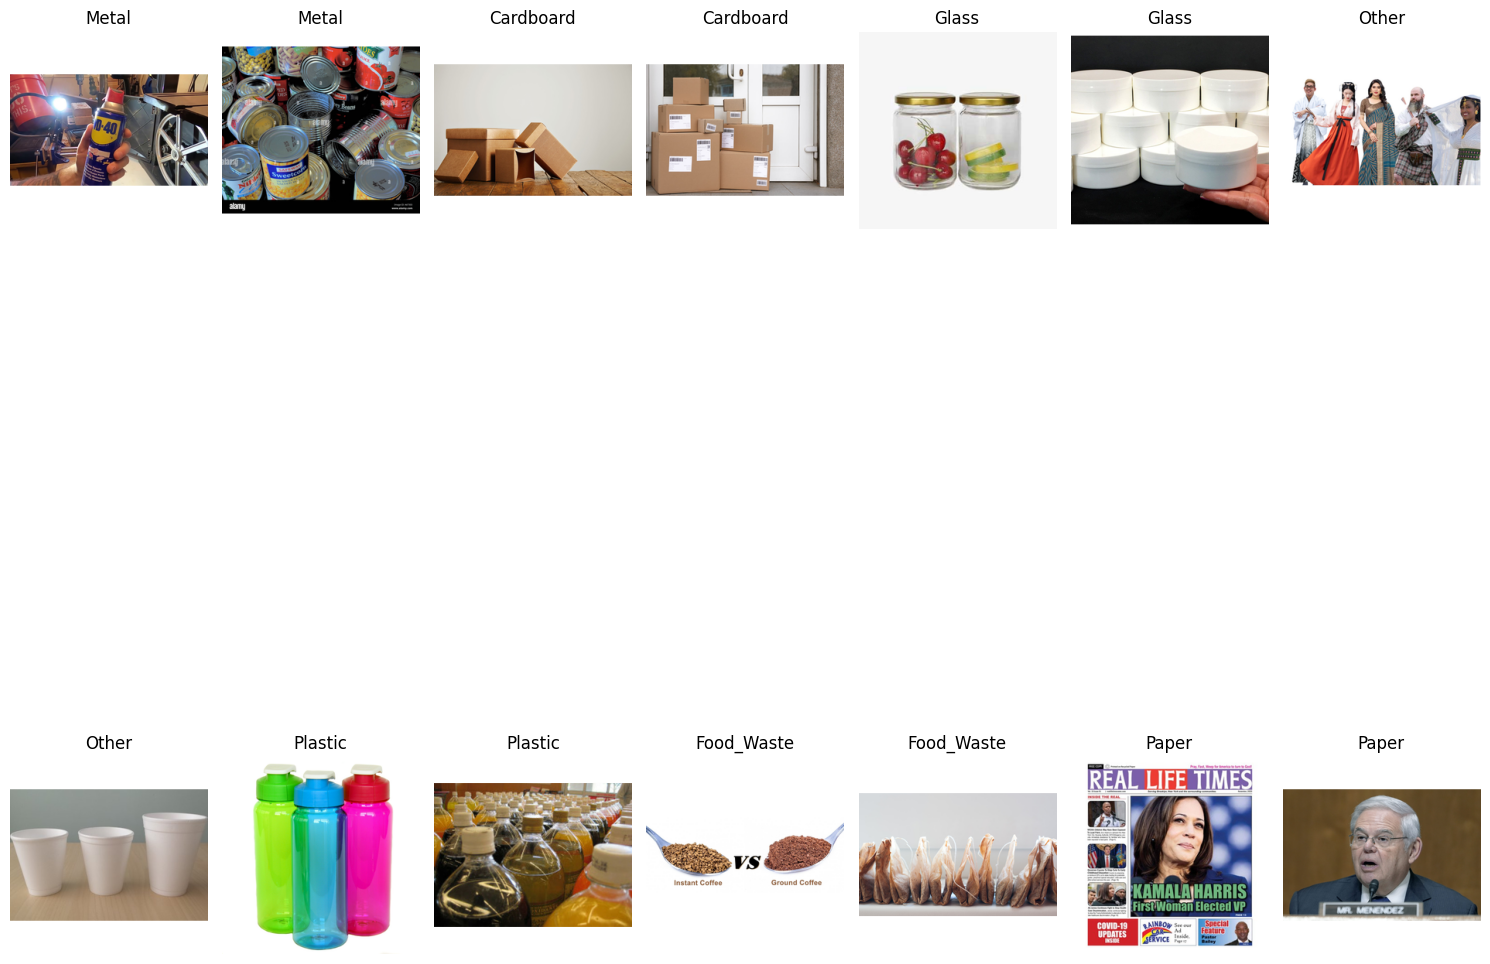

In [10]:
# Visualise Sample Images (across different labels)

sample_images = []
sample_labels = []
for label in unique_labels:
    indices = [i for i, l in enumerate(labels) if l == label]
    i = np.random.randint(0, len(indices))
    j = np.random.randint(0, len(indices))
    sample_images.append(images[indices[i]])
    sample_labels.append(labels[indices[i]])
    sample_images.append(images[indices[j]])
    sample_labels.append(labels[indices[j]])


fig, axes = plt.subplots(2, 7, figsize=(15, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i])
    ax.set_title(sample_labels[i])
    ax.axis('off')
plt.tight_layout()
plt.show()







#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [11]:
# Find the smallest and largest image dimensions from the data set

min_width = min(img.width for img in images)
min_height = min(img.height for img in images)
max_width = max(img.width for img in images)
max_height = max(img.height for img in images)

print("Smallest image dimensions:", min_width, "x", min_height)
print("Largest image dimensions:", max_width, "x", max_height)



Smallest image dimensions: 256 x 256
Largest image dimensions: 256 x 256


In [2]:
# Resize the image dimensions

import cv2
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np

img_height= 128
img_width= 128
data_dir= 'data/data'

def resize_images(data_dir, img_height, img_width):
    resized_data = []
    labels = []
    for folder in os.listdir(data_dir):
      folder_path = os.path.join(data_dir, folder)
      if not os.path.isdir(folder_path):
        continue
      for file in tqdm(os.listdir(folder_path), desc=f"preprocessing {folder}"):
        file_path = os.path.join(folder_path, file)

        try:
          img = load_img(file_path, target_size=(img_height, img_width))
          img_array = img_to_array(img)/255.0
          resized_data.append(img_array)
          labels.append(folder)
        except Exception as e:
          print(f"Error processing image {file_path}: {e}")
    return np.array(resized_data), np.array(labels)

resized_data, labels = resize_images(data_dir, img_height, img_width)
print(resized_data.shape)
print(labels.shape)




preprocessing Paper: 100%|██████████| 1030/1030 [00:03<00:00, 319.27it/s]


(7625, 128, 128, 3)
(7625,)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [3]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

print(labels)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
print("integer encoded labels:", encoded_labels[:10])

print("class mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

['Metal' 'Metal' 'Metal' ... 'Paper' 'Paper' 'Paper']
integer encoded labels: [3 3 3 3 3 3 3 3 3 3]
class mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [4]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(resized_data, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)

Training data shape: (6100, 128, 128, 3)
Training labels shape: (6100,)
Validation data shape: (1525, 128, 128, 3)
Validation labels shape: (1525,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [5]:
# Build and compile the model
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
input_shape = (128, 128, 3)
encoded_labels = to_categorical(encoded_labels)
num_classes = encoded_labels.shape[1]

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding= 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding= 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding= 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,484,807 (32.37 MB)

 Trainable params: 8,484,359 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [6]:
import matplotlib.pyplot as plt
# Training
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels), verbose=1)

def plot_training_history(history):
  plt.figure(figsize=(14, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()

  plot_training_history(history)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.2543 - loss: 2.5677 - val_accuracy: 0.0708 - val_loss: 9.2637
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.3339 - loss: 1.7284 - val_accuracy: 0.2118 - val_loss: 3.9933
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3610 - loss: 1.6743 - val_accuracy: 0.3790 - val_loss: 2.3577
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3907 - loss: 1.5862 - val_accuracy: 0.4184 - val_loss: 1.9292
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4267 - loss: 1.5405 - val_accuracy: 0.4203 - val_loss: 1.8326
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4200 - loss: 1.5195 - val_accuracy: 0.4295 - val_loss: 1.8383
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4386 - loss: 1.4664 - val_accuracy: 0.4531 - val_loss: 1.7751
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4708 - loss: 1.4004 - val_ac

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [8]:
# Evaluate on the test set; display suitable metrics

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

test_loss, test_accuracy = model.evaluate(val_data, val_labels, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_labels # Removed np.argmax as val_labels is already integer encoded

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on test data')
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4407 - loss: 2.0476
Test Loss: 2.19608998298645
Test Accuracy: 0.42426228523254395
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.63      0.35      0.45       108
  Food_Waste       0.64      0.41      0.50       200
       Glass       0.36      0.27      0.31       150
       Metal       0.41      0.21      0.28       200
       Other       0.38      0.16      0.23       202
       Paper       0.48      0.28      0.35       206
     Plastic       0.39      0.77      0.52       459

    accuracy                           0.42      1525
   macro avg       0.47      0.35      0.38      1525
weighted avg       0.45      0.42      0.40      1525

Confusion Matrix:


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

**Insights from Data Exoloration**


1.   The dataset consists of 7 waste categories.
2.   images had varying resolutions so resizing to 128*128 was essential to standardize inputs for CNN model training.
3. label encoding and one-hot encoding ensured the categorical labels were macine readable for CNN classification.

**Insigts from Model Training**
1. I built a CNN model with 3 convolutional layers, batch normalization, dropout and fully connected layers.
2. Training was performed for 10 epochs with a batch size of 32.
3. Validation accuracy improved steadily.
4. final performance:
   

*   training accuracy = 50%
*   validation accuracy = 47%
*   test accuracy = 42%
*   F1 score- high for well-represented classes(plastic, glass), lower for under-represented classes(trash, metals)


Dropout and Batch Normalization reduced overfitting and stabilized training.





